<Axes: title={'center': 'Average Sale Price by Year Built'}, xlabel='YearBuilt'>

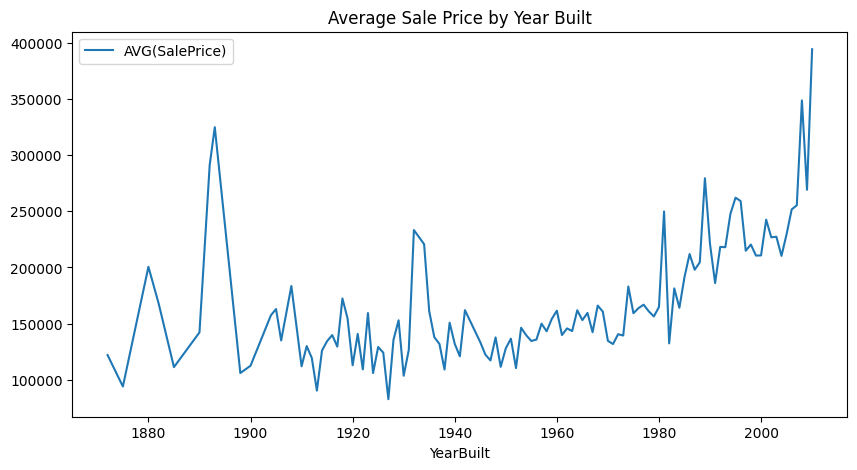

In [1]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool
import os
import load_dotenv

load_dotenv.load_dotenv()

connect_args={'ssl': {'tls': True}}
engine = create_engine("mysql+pymysql://{0}:{1}@{2}:3306/incubator"
                       .format(os.environ['MYSQL_USER'], os.environ['MYSQL_PASSWORD'], os.environ['MYSQL_HOST']), 
                       connect_args=connect_args, poolclass=NullPool)

df = pd.read_sql('SELECT YearBuilt, AVG(SalePrice) FROM incubator.housing_prices_train group by YearBuilt order by YearBuilt asc;', con=engine)
display(df.plot(x='YearBuilt', y='AVG(SalePrice)', kind='line', title='Average Sale Price by Year Built', figsize=(10, 5)))